## Algunos métodos de clasificación simples aplicados al dataset iris.


In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
#La siguiente función graficará los datos así como las regiones correspondientes
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, 
                    c=colors[idx], label=cl, edgecolor='black', marker=markers[idx])
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', 
                    alpha=1.0,linewidth=1, marker='o',s=100, label='conjunto de prueba')

In [3]:
# Tomamos todas las filas y solo la tercera y cuarta columna, correspondientes
# a la longitud y anchura del pétalo.
# Las etiquetas están asignadas de la siguiente manera:
# Iris-setosa -> 0    Iris-versicolor -> 1    Iris-virginica -> 2

iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

#predecimos y evaluamos los resultados:
y_pred = ppn.predict(X_test_std)
print('Datos mal clasificados: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' %(accuracy_score(y_test, y_pred)))

Datos mal clasificados: 1
Accuracy: 0.98


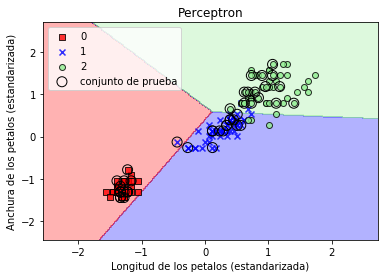

In [5]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Longitud de los petalos (estandarizada)')
plt.ylabel('Anchura de los petalos (estandarizada)')
plt.title('Perceptron')
plt.legend(loc='upper left')
plt.show()

### 

### 

## Aplicando regresión logística a los mismos datos:


In [6]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

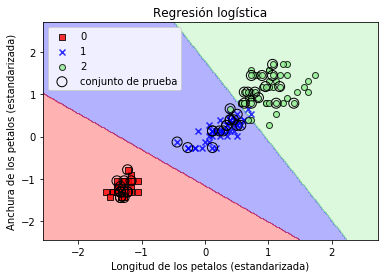

In [7]:
plot_decision_regions(X_combined_std, y_combined_std, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Longitud de los petalos (estandarizada)')
plt.ylabel('Anchura de los petalos (estandarizada)')
plt.legend(loc='upper left')
plt.title('Regresión logística')
plt.show()

In [8]:
print('Datos mal clasificados: %d' %(y_test != lr.predict(X_test_std)).sum())
print('Accuracy: %.2f' %(accuracy_score(y_test, y_pred)))

Datos mal clasificados: 1
Accuracy: 0.98


### 

### 

### SVM

In [9]:
from sklearn.svm import SVC

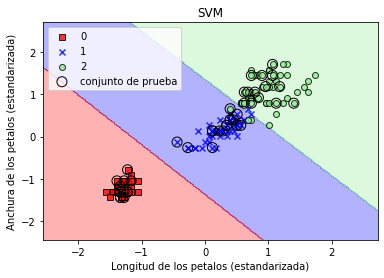

In [10]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Longitud de los petalos (estandarizada)')
plt.ylabel('Anchura de los petalos (estandarizada)')
plt.title('SVM')
plt.legend(loc='upper left')
plt.show()

In [11]:
print('Datos mal clasificados: %d' %(y_test != svm.predict(X_test_std)).sum())
print('Accuracy: %.2f' %(accuracy_score(y_test, svm.predict(X_test_std))))

Datos mal clasificados: 1
Accuracy: 0.98


### 

### 

### SVM kernelizada

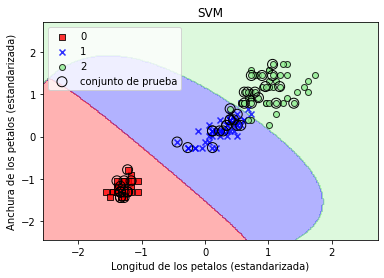

In [12]:
svm_k = SVC(kernel='rbf', random_state=1, gamma=0.3, C=1.0)
svm_k.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, classifier=svm_k, test_idx=range(105, 150))
plt.xlabel('Longitud de los petalos (estandarizada)')
plt.ylabel('Anchura de los petalos (estandarizada)')
plt.title('SVM')
plt.legend(loc='upper left')
plt.show()

In [13]:
print('Datos mal clasificados: %d' %(y_test != svm_k.predict(X_test_std)).sum())
print('Accuracy: %.2f' %(accuracy_score(y_test, svm_k.predict(X_test_std))))

Datos mal clasificados: 1
Accuracy: 0.98


### 

### 

### Árbol de decisión.

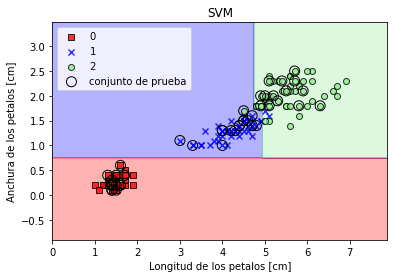

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('Longitud de los petalos [cm]')
plt.ylabel('Anchura de los petalos [cm]')
plt.title('SVM')
plt.legend(loc='upper left')
plt.show()